# Lista 3

## zadanie 1

In [1]:
import numpy as np

In [2]:
u = np.float32(1)
while np.float32(1) + u != np.float32(1):
    u /= np.float32(2)
u = np.float32(u)
print(u)

5.9604645e-08


In [3]:
def eliminacja_gaussa_z_wyborem(A, b):
  n = len(b)
  x = np.zeros(n)

  # Eliminacja współczynników
  for k in range(n-1):
    # Wybór elementu podstawowego
    max_index = k + np.argmax(np.abs(A[k:, k]))
    if max_index != k:
      A[[k, max_index]] = A[[max_index, k]]
      b[[k, max_index]] = b[[max_index, k]]

    for i in range(k+1, n):
      factor = A[i, k] / A[k, k]
      A[i, k:] -= factor * A[k, k:]
      b[i] -= factor * b[k]

  # Podstawianie wstecz
  x[n-1] = b[n-1] / A[n-1, n-1]
  for i in range(n-2, -1, -1):
    x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

  return x

In [4]:
def inverse_matrix(A, tol = 1e-15):
    det = np.linalg.det(A)
    if not np.isclose(det, 0, atol=tol):
        I = np.eye(A.shape[0])
        return np.column_stack([eliminacja_gaussa_z_wyborem(A.copy(), I[:, i]) for i in range(len(I[1]))])
    else:
        print("Macierz nie jest odwracalna (wyznacznik ≈ 0 w zadanej tolerancji).")
        return False

In [5]:
def iteracyjnie_poj_prec(A, b):
  A, b = A.astype(np.float32), b.astype(np.float32)
  A_inv = inverse_matrix(A).astype(np.float32)
  x = np.dot(A_inv, b)
  r = b - np.dot(A, x)
  i = 0
  while (np.linalg.norm(r) > np.linalg.norm(np.dot(A, x))*u) & (i <1000 ):
    x += np.dot(A_inv, r)
    r = b - np.dot(A, x)
    i +=1
  return x, i


In [6]:
b1 = np.array([5,4,3,2,1])
A1 = np.array([[1/(i+j-1) for i in range(1,6) ]  for j in range(1,6)])
iteracyjnie_poj_prec(A1, b1)

(array([   -94.87791,   2157.6992 , -10700.028  ,  17904.896  ,
         -9442.598  ], dtype=float32),
 161)

## zadanie 2

In [7]:
n = 20
x = np.zeros(n)

In [8]:
def generowanie_macierzy(n):
  A = np.zeros((n,n))
  A[0][0] = 4
  A[0][n-1] = 1
  A[n-1][0] = 1
  for i in range(1, n):
    A[i][i] = 4
    A[i-1][i] = -1
    A[i][i-1] = -1
  D = np.diag(np.diag(A))
  L = np.tril(A, -1)
  U = np.triu(A, 1)
  return A, L, D, U

In [9]:
def gauss_seidel(n, tol=1e-10, max_iter=1000):
  A, L, D, U = generowanie_macierzy(n)
  b = np.zeros(n)
  b[-1] = 100
  N = inverse_matrix(D+L)
  Mgs = -np.dot(N, U)
  x = np.zeros(n)
  zbiega = max(abs(np.linalg.eigvals(Mgs))) < 1
  for i in range(max_iter):
    x = np.dot(N, b) + np.dot(Mgs, x)
    if np.linalg.norm(np.dot(A, x) - b) < tol:
      return x, i, zbiega

In [10]:
wynik = gauss_seidel(20)
print(wynik)

(array([-7.73502692e+00, -2.07259421e+00, -5.55349941e-01, -1.48805549e-01,
       -3.98722562e-02, -1.06834753e-02, -2.86164518e-03, -7.63105383e-04,
       -1.90776347e-04, -1.12140772e-12,  1.90776345e-04,  7.63105381e-04,
        2.86164518e-03,  1.06834753e-02,  3.98722562e-02,  1.48805549e-01,
        5.55349941e-01,  2.07259421e+00,  7.73502692e+00,  2.88675135e+01]), 24, True)


## zadanie 3

In [11]:
import time

In [12]:
A, _, _, _ = generowanie_macierzy(n)
b = np.zeros(n)
b[-1] = 100
w2 = np.linalg.solve(A, b)
print(wynik[0] - w2)

[-6.17106366e-12 -6.81898982e-12 -6.85473900e-12 -6.34725605e-12
 -5.46817452e-12 -4.41888019e-12 -3.37244685e-12 -2.44466470e-12
 -1.69136105e-12 -1.12140769e-12 -7.14674468e-13 -4.37541930e-13
 -2.51820700e-13 -1.12600901e-13  3.78447274e-14  2.61929367e-13
  5.98965322e-13  1.03739239e-12  1.50901514e-12  1.91846539e-12]


In [13]:
start = time.time()
gauss_seidel(n)
end = time.time()
t1 = end - start
start = time.time()
A, _, _, _ = generowanie_macierzy(n)
b = np.zeros(n)
b[-1] = 100
np.linalg.solve(A, b)
end = time.time()
t2 = end - start

In [14]:
t1, t2, t1> t2

(0.09196043014526367, 0.0009987354278564453, True)

Widzimy, że zaimplementowana metoda Gaussa-Seidla działa wolniej od wbudowanej funkcji do obliczania rozwiązań równań liniowych.

## zadanie 4

In [15]:
import matplotlib.pyplot as plt

In [33]:
def matrix_4(n = 20):
  A = np.zeros((n,n))
  diagonal_values = np.linspace(0.025, 0.5, n)
  np.fill_diagonal(A, diagonal_values)
  for i in range(n-1):
    # A[i][i] = 0.025*(i+1)
    A[i][i+1] = 5
  return A

In [51]:
def zadanie4(n=20):
  B = matrix_4()
  x =  np.ones(n)
  etas = []
  k = 100
  k_min = None
  x0_norm = np.linalg.norm(x, 2)
  for i in range(1, k+1):
    x = B @ x
    norma  = np.linalg.norm(x, 2)
    # print(i, norma)
    eta = norma/x0_norm
    etas.append(eta)
    if k_min == None and eta < 1:
      k_min = i
  return etas, k_min

86


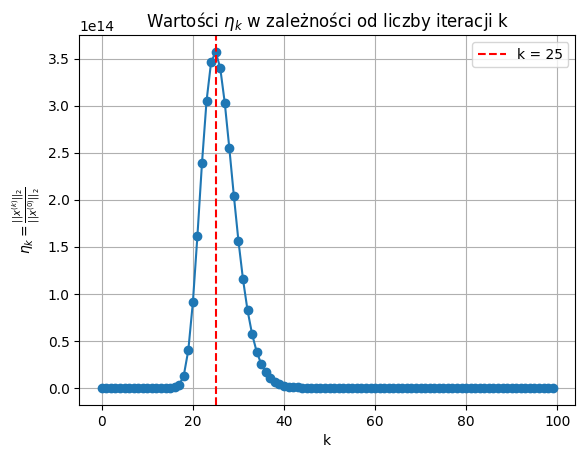

In [52]:
etaaa, k_min = zadanie4(20)
print(k_min)
plt.plot(etaaa, marker='o')
plt.axvline(x=25, color='red', linestyle='--', label=f'k = {25}')
plt.xlabel('k')
plt.ylabel(r'$\eta_k = \frac{||x^{(k)}||_2}{||x^{(0)}||_2}$')
plt.title('Wartości $\eta_k$ w zależności od liczby iteracji k')
plt.grid(True)
plt.legend()
plt.show()

In [54]:
print(f'Najmniejsze k, dla którego spełniona jest nierówność z polecenia: {k_min}')

Najmniejsze k, dla którego spełniona jest nierówność z polecenia: 86
